# ch2.[실습 1] 학습 데이터 전체 실습

### Key Point
    - 데이터 유형에 따른 데이터 로드 및 데이터 확인
    - Data Sampling 실습
    - Class Imbalance 처리 알고리즘 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats.mstats import kruskal
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

# library for sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier
from xgboost import plot_importance

## 1. Check Data

In [ ]:
!pwd
path_lecture = "./drive/MyDrive/MLops/clip06_DataPreparing/"
random_state = 1234

/content


In [ ]:
!ls

drive  sample_data


#### 1) Structured

In [ ]:
df = pd.read_csv(path_lecture + "data/winequality.csv")
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')



```
# This is formatted as code
```

#### 2) Semi-Structured

In [ ]:
import json

# 샘플 JSON 데이터
data_str = """{
    "employees": [
        {"name": "Alice", "age": 28, "occupation": "Engineer"},
        {"name": "Bob", "age": 24, "occupation": "Data Scientist"},
        {"name": "Charlie", "age": 22, "occupation": "Designer"}
    ]
}"""

data = json.loads(data_str)
for employee in data["employees"]:
    print(employee)


{'name': 'Alice', 'age': 28, 'occupation': 'Engineer'}
{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}
{'name': 'Charlie', 'age': 22, 'occupation': 'Designer'}


In [ ]:
data["employees"][0]["income"] = 10000

In [ ]:
data["employees"][0]

{'name': 'Alice', 'age': 28, 'occupation': 'Engineer', 'income': 10000}

In [ ]:
data["employees"][1]

{'name': 'Bob', 'age': 24, 'occupation': 'Data Scientist'}

#### 3) Check Unstructured

In [ ]:
from PIL import Image

In [ ]:
img = Image.open(path_lecture + "data/dog_sample_image.jpeg")

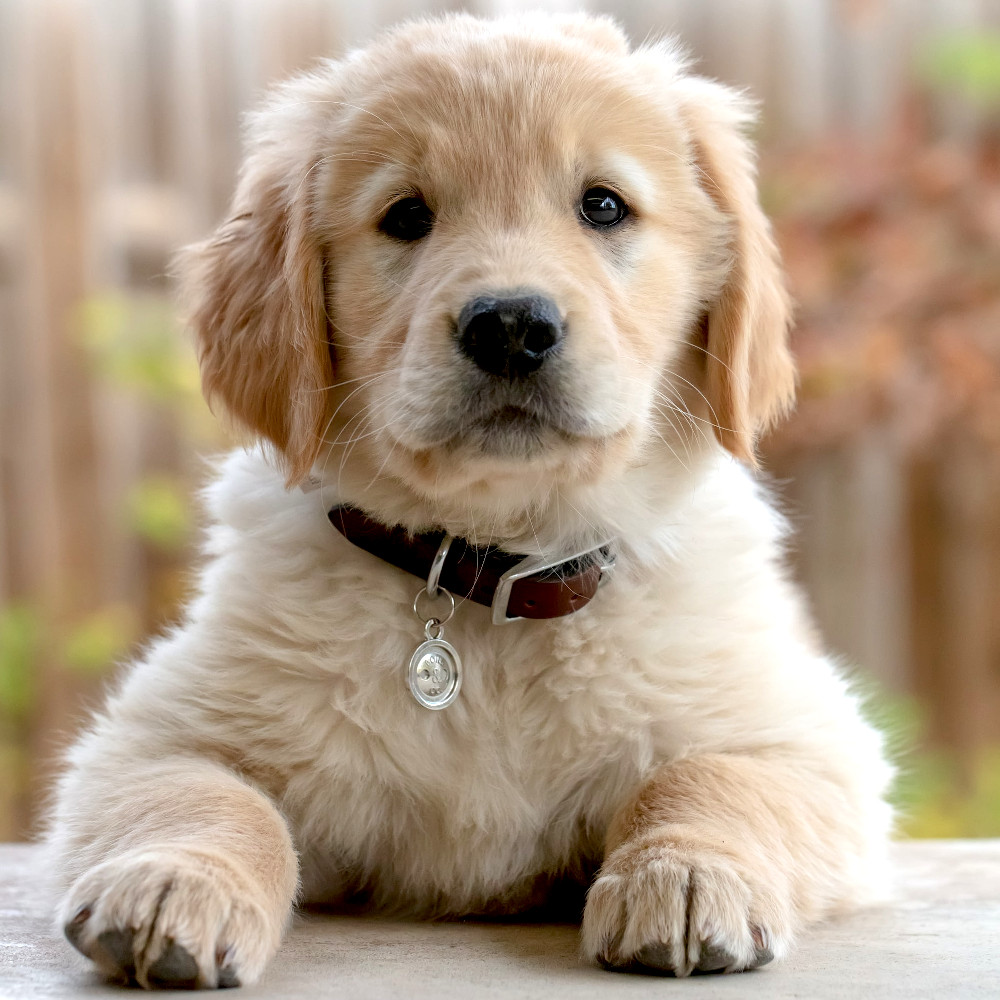

In [ ]:
img

In [ ]:
# 1. Flip image
flipped_image = img.transpose(Image.FLIP_TOP_BOTTOM)

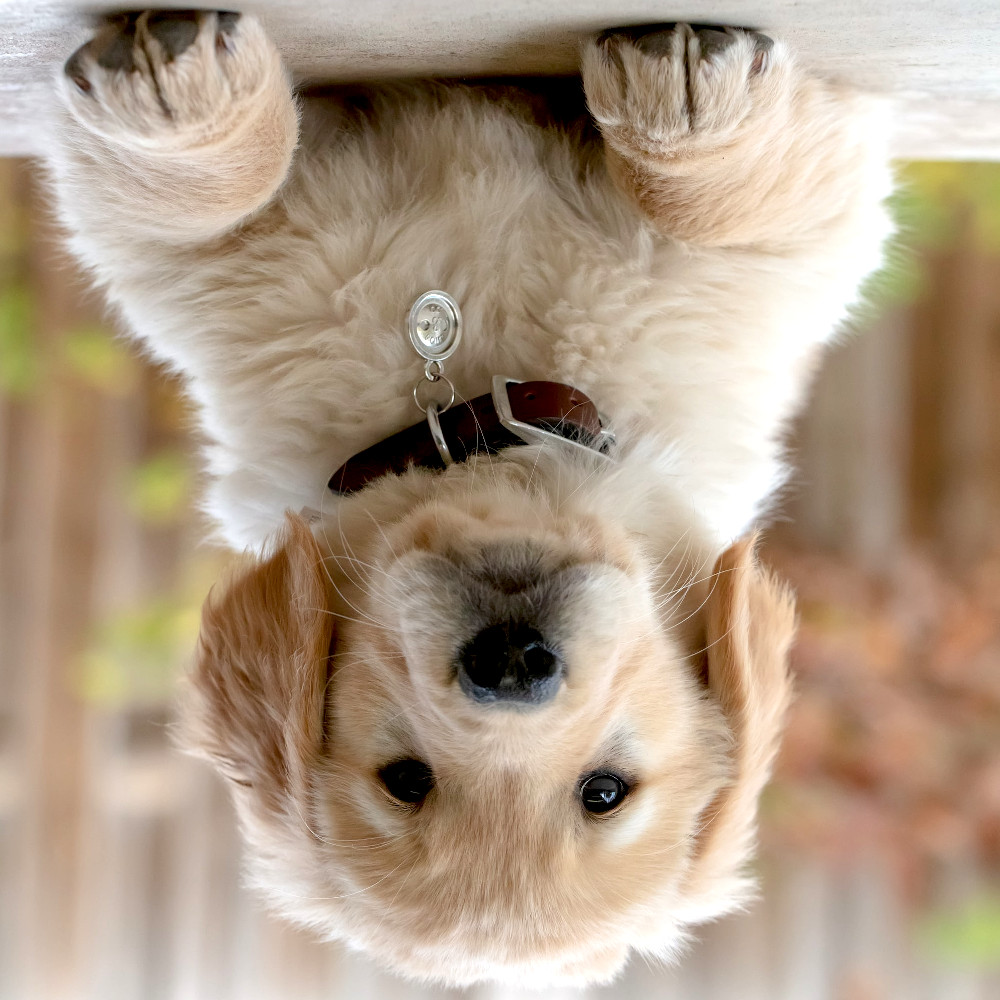

In [ ]:
flipped_image

In [ ]:
# 2. transpose
mirrored_image = img.transpose(Image.FLIP_LEFT_RIGHT)

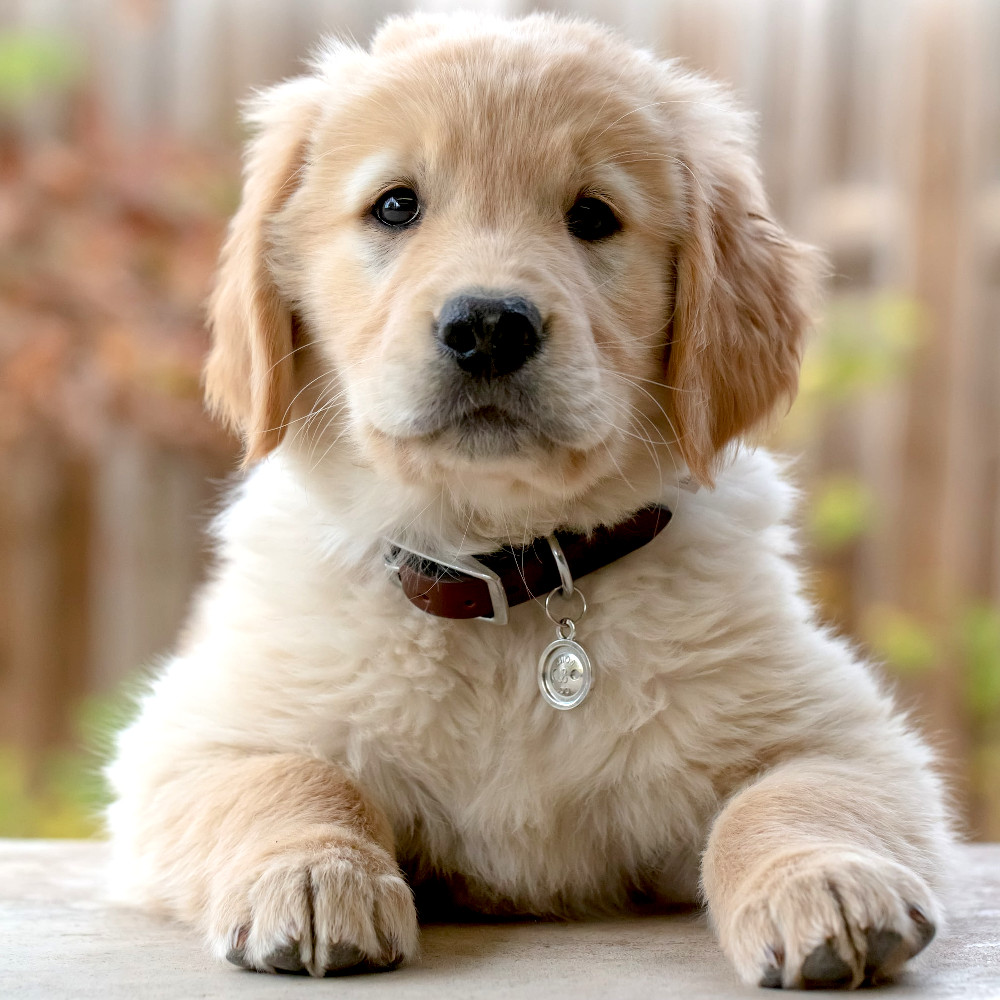

In [ ]:
mirrored_image

In [ ]:
# Resize in half
width, height = img.size
shrinked_image = img.resize((width // 2, height // 2))

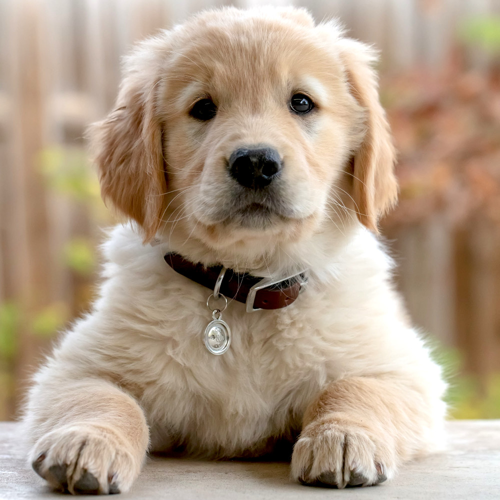

In [ ]:
shrinked_image

## 2. Data Sampling

In [ ]:
# Generate data for hands-on
data = pd.DataFrame({
    'Age': np.random.randint(20, 40, 100),
    'Income': np.random.randint(50000, 100000, 100)
})

In [ ]:
data.head(10)

Age  Income
0   38   50351
1   39   92785
2   34   92706
3   21   60699
4   35   75204
5   30   98523
6   27   60922
7   39   56811
8   29   88676
9   31   94633

#### 1) Random Sampling

In [ ]:
# choose ransdom 10 numbers
random_samples = data.sample(n=10)
print(random_samples)

    Age  Income
76   31   71232
13   22   61941
57   35   74238
38   39   54395
15   35   85639
74   22   61645
22   20   56265
62   38   88899
85   32   59701
18   33   99629


#### 2) Stratified Sampling

In [ ]:
# 'Age' 컬럼을 기준으로 층화 샘플링
train, test = train_test_split(data, test_size=0.2, stratify=data['Age'])
print(train)


    Age  Income
10   28   78424
79   24   92507
70   22   74878
27   35   87738
20   25   65774
..  ...     ...
75   35   52070
2    34   92706
98   25   57437
38   39   54395
28   37   60318

[80 rows x 2 columns]


#### 3) Cluster Sampling


In [ ]:
# The bins argument accepts a sequence of values that represent the edges or boundaries of the bins. In this case
data['cluster'] = pd.cut(data['Age'], bins=[20, 25, 30, 35, 40], labels=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])

# Select random cluster
selected_cluster = np.random.choice(data['cluster'].unique())

cluster_samples = data[data['cluster'] == selected_cluster]
print(cluster_samples)



    Age  Income    cluster
3    21   60699  cluster_1
13   22   61941  cluster_1
14   23   61863  cluster_1
17   25   85264  cluster_1
20   25   65774  cluster_1
32   24   66690  cluster_1
34   21   54005  cluster_1
39   24   88625  cluster_1
40   23   68909  cluster_1
42   23   55533  cluster_1
49   24   70344  cluster_1
50   25   50256  cluster_1
59   24   73640  cluster_1
65   25   76908  cluster_1
68   23   54176  cluster_1
70   22   74878  cluster_1
71   24   99933  cluster_1
74   22   61645  cluster_1
79   24   92507  cluster_1
80   22   99175  cluster_1
86   22   95315  cluster_1
93   21   66260  cluster_1
94   24   90889  cluster_1
98   25   57437  cluster_1


## 4) Weight Sampling
#### Why Weighted Sampling?

- Account for Importance: Some data points might be more important or representative than others.
- Correct for Bias: If your data is not evenly distributed, weighted sampling can help to create a more balanced sample.
- Simulate Real-World Scenarios: In many real-world situations, certain events or individuals are more likely to occur or be selected than others. Weighted sampling can model this behavior.


## Considerations

It's essential to remember that random weights do not directly reflect the true importance of each data point. For more accurate and meaningful weighted sampling, it's generally recommended to assign weights based on relevant features or domain expertise.




In [ ]:


# generate random numbers from a uniform distribution over the interval [0, 1)
weights = np.random.rand(len(data))

# Pandas DataFrame method that is used to extract a random sample of rows from the DataFrame.
weight_samples = data.sample(n=10, weights=weights)
print(weight_samples)

    Age  Income    cluster
17   25   85264  cluster_1
97   35   83431  cluster_3
18   33   99629  cluster_3
53   20   54588        NaN
8    29   88676  cluster_2
70   22   74878  cluster_1
61   34   79642  cluster_3
5    30   98523  cluster_2
41   35   98710  cluster_3
32   24   66690  cluster_1


#### 5) Importance Sampling

In [ ]:
# Weights to the income column
def importance_function(x):
    return x**2

weights = importance_function(data['Income'])
normalized_weights = weights / sum(weights)
importance_samples = data.sample(n=10, weights=normalized_weights)
print(importance_samples)


    Age  Income    cluster
63   30   57901  cluster_2
40   23   68909  cluster_1
92   27   72995  cluster_2
17   25   85264  cluster_1
72   31   76481  cluster_3
26   28   57233  cluster_2
93   21   66260  cluster_1
0    38   50351  cluster_4
86   22   95315  cluster_1
84   29   74372  cluster_2


##Data Labeling

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# The load_iris() function loads the Iris dataset, a classic and well-known
# dataset in machine learning and statistics. This dataset contains measurements
# of 150 iris flowers
data = load_iris()


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(data.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1) Supervised Learning
* train_test_split: This function from the sklearn.model_selection module is used to split your dataset into training and testing sets.
* data.data: This likely refers to the features (input variables) of your dataset.
* data.target: This likely refers to the labels (output variable) of your dataset.

* test_size=0.2: This means 20% of the data will be used for testing, and the remaining 80% will be used for training the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
# 모델 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 예측
predictions = clf.predict(X_test)
print(predictions)

[2 0 1 2 1 0 2 0 1 1 0 0 2 1 1 0 2 1 2 1 2 2 1 0 2 0 1 2 1 1]


### 2) Un-Supervised Learning

In [ ]:
from sklearn.cluster import KMeans

# KMeans is a popular unsupervised machine learning algorithm used for clustering.
# It aims to partition a dataset into K distinct, non-overlapping clusters, where
# each data point belongs to the cluster with the nearest mean (centroid).

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data.data)

print(clusters)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### 3) Semi-Supervised Learning

In [ ]:
from sklearn.semi_supervised import LabelSpreading

# Using partial labels
labels = np.copy(data.target)
random_unlabeled_points = np.random.rand(len(labels)) < 0.5
labels[random_unlabeled_points] = -1

# Training model
lp_model = LabelSpreading()
lp_model.fit(data.data, labels)

# Prediction
lp_predictions = lp_model.predict(data.data)
print(lp_predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Class Imbalance

### Sampling for Class Imbalance
*  In this practice, we will utilize two oversampling techniques and conduct model optimization using the data generated by these techniques.

* SMOTE (Synthetic Minority Over-sampling Technique): This is a method for generating synthetic samples in the minority class. It creates a set K of neighboring minority class data points for a specific minority class data point A based on the k-nearest neighbors (knn) algorithm. New data points are then generated between A and the points in set K.

* ADASYN (Adaptive Synthetic Sampling Approach): While SMOTE creates the same number of new samples for each minority class, ADASYN generates more data points between minority class data points that are further apart.


##### 데이터 로드

In [ ]:
X_base = pd.read_csv(path_lecture + "data/winequality_for_class_imbalance.csv")
X_base.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0      -0.165087         -0.440021     0.280208        3.477382   
1           1      -0.695163         -0.261684     0.144245       -0.766859   
2           2       0.667890         -0.380575     0.552136        0.410863   
3           3      -0.013636         -0.677803     0.008281        0.766401   
4           4      -0.770888         -0.142793    -1.079428        0.433084   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0  -0.316815             0.838865              0.984149  2.177419 -1.401186   
1  -0.208407            -0.900220              0.314921 -0.180598  0.472180   
2  -0.181305            -0.002628             -0.301474  0.189947  0.222398   
3   0.035512             0.951064              1.265929  0.358377 -0.214721   
4  -0.316815            -0.002628              0.385366  0.122576 -0.277166   

   sulphates   alcohol  type_red  type_white  
0  -0.555267 -1.475154         0           1  
1  -0.288309 -0.885144         0           1  
2  -0.622007 -0.379421         0           1  
3  -0.888964 -0.547996         0           1  
4  -0.421788 -0.800857         0           1

In [ ]:
X_base = X_base.drop('Unnamed: 0', axis=1)

In [ ]:
Y_encoded = np.load(path_lecture + "data/winequality_for_class_imbalance_label.npy")

In [ ]:
Y_encoded

array([3, 3, 3, ..., 2, 2, 3])

##### SMOTE

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y_encoded, test_size=0.25, stratify=Y_encoded)

In [ ]:
sm = SMOTE(random_state=random_state, k_neighbors=3)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

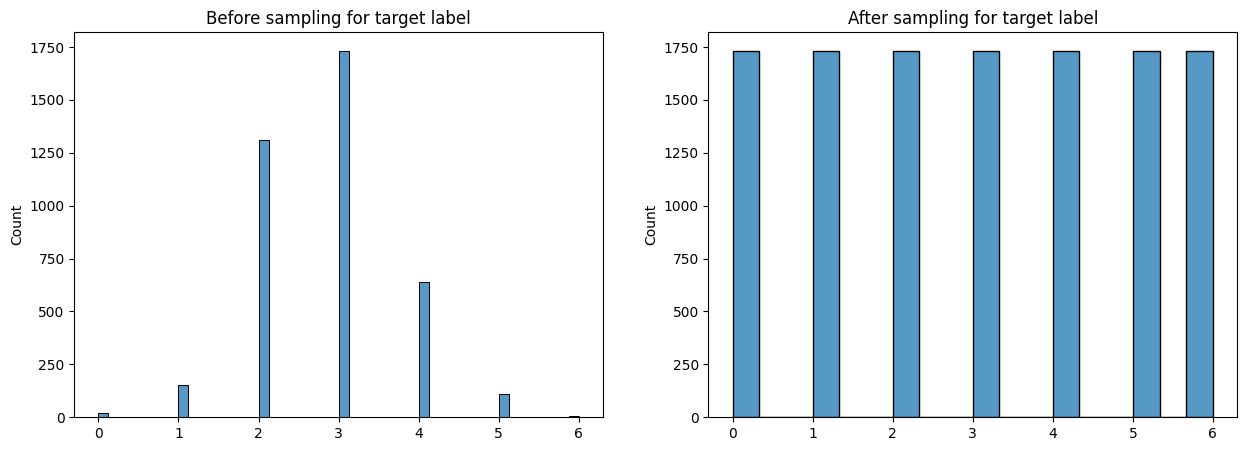

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_sm_sampling)
plt.title("After sampling for target label")

##### ADASYN

In [ ]:
ada = ADASYN(random_state=random_state, n_neighbors=3)
X_ada_sampling, y_ada_sampling = ada.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After sampling for target label')

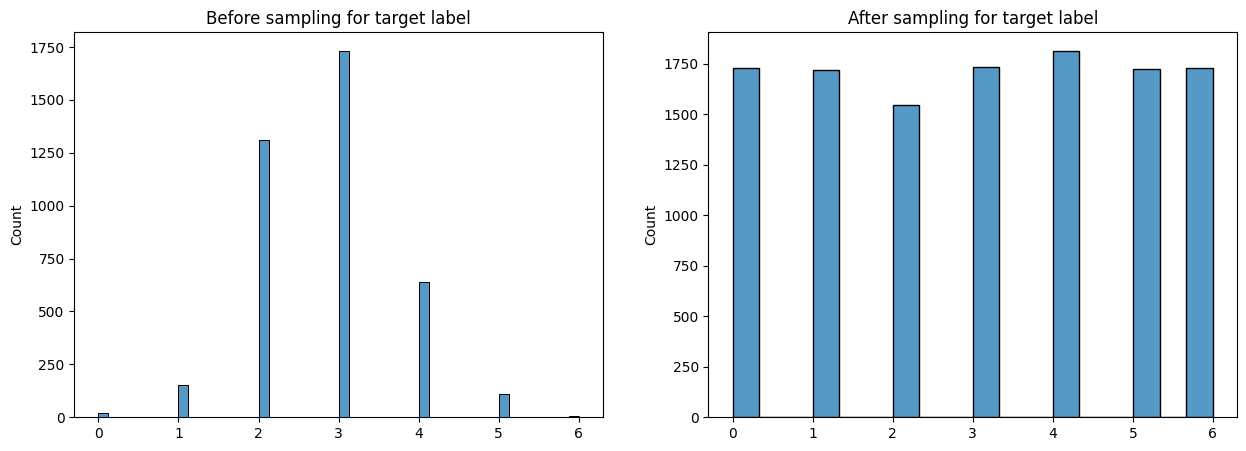

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before sampling for target label")

fig.add_subplot(122)
sns.histplot(y_ada_sampling)
plt.title("After sampling for target label")